# Numerical handling of schrodinger equation

Consider the following one dimensional schrodinger equation -

$$
\frac{-\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} + V(x)\Psi(x) = E\Psi(x)
$$

in range $x \in [a, b]$ with boundary condition $\Psi(x=a)=\Psi_a$, and $\Psi(x=b)=\Psi_b$

- We first descretize the `position' space and define $x_n = a + t n$ where $t = \frac{b - a}{N}$, $N$ being the number of samples. $x_0 = a$, and $x_N = b$

- We approximate the double derivatives using central difference formula

$$
\frac{d^2\Psi}{d x^2}\biggr|_{x=x_n} \approx {\Psi_{n+1} -2 \Psi_{n} + \Psi_{n-1} \over t^2}
$$

We approximate the double derivatives using central difference formula

$$
-\frac{\hbar^2}{2mt^2}\left({\Psi_{n+1} -2 \Psi_{n} + \Psi_{n-1}}\right) + V_n\Psi_n = E\Psi_n
$$

or, rearranging the terms we get

$$
\left(-{\Psi_{n+1} +2 \Psi_{n} - \Psi_{n-1}}\right) + \frac{2mt^2}{\hbar^2}V_n\Psi_n = E\Psi_n
$$

equivalently

$$
-\Psi_{n+1} +(2 + \frac{2mt^2}{\hbar^2}V_n)\Psi_n - \Psi_{n-1} = E\Psi_n
$$

Using $v_n = 2(1 + \frac{mt^2}{\hbar^2})V_n$, we can simplify the recurrance relation as following 
$$
-\Psi_{n+1} + v_n\Psi_{n} -\Psi_{n-1} = E\Psi_n
$$



We approximate the double derivatives using central difference formula



In [1]:
from ast import Del
import numpy as np
import matplotlib.pyplot as plt

# constants

Box_Width = 3.0
Delta = 0.1 * Box_Width
V0 = 30.0

alpha = 1.0
Npoints = 1000

def potential_box(x):
    f = 0.0
    if abs(x) <= Box_Width:
        f = 0.0
    else:
        if abs(x) > Box_Width and abs(x) <= Box_Width + Delta:
            f = V0
        else:
            f = 100 * V0
    #
    return f

def potential_harmonic(x):
    return x**2
#
potential = potential_box
Fvec = np.vectorize(potential)

xi, dx = np.linspace(-Box_Width - Delta, Box_Width + Delta, Npoints, retstep=True)

In [2]:
Vi = Fvec(xi)
vi = 2 * (1 + alpha * dx**2 * Vi)
Psi = np.zeros(xi.shape)

In [24]:
def get_matrix(vi):
    n = vi.shape[0]
    mat = np.zeros((n, n))
    for i in range(1, n):
        mat[i, i - 1] = -1
        mat[i-1, i] = -1
    #
    np.fill_diagonal(mat, vi)
    return mat
#

M = get_matrix(vi)
eig, vecs = np.linalg.eigh(M)


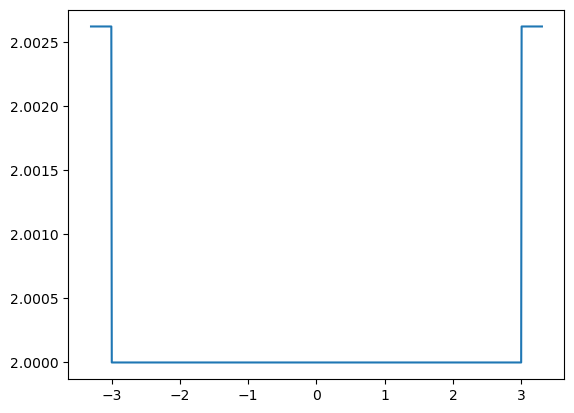

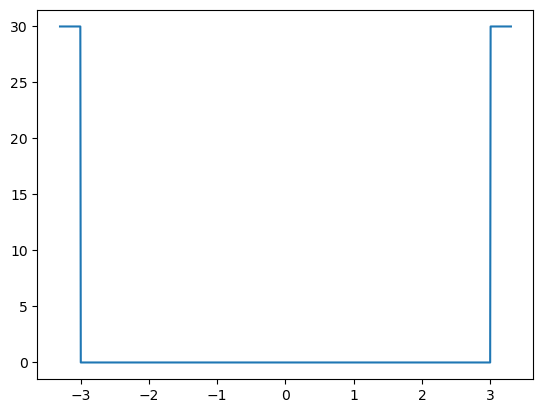

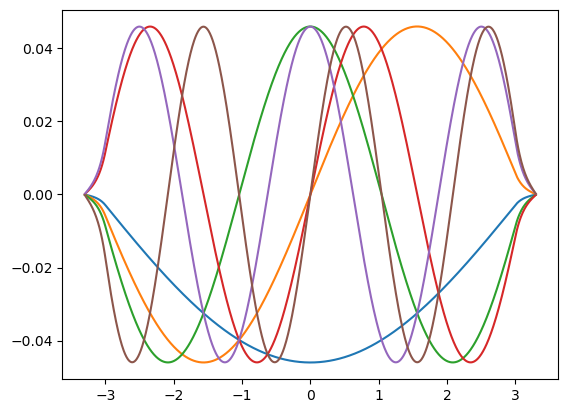

In [25]:
plt.plot(xi, vi)
plt.show()

plt.plot(xi, Vi)
plt.show()
for i in range(6):
    plt.plot(xi, vecs[:, i])
#plt.plot(vecs[0])
plt.show()

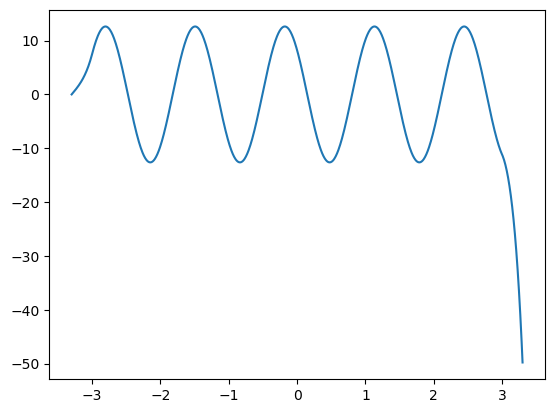

In [5]:
def boundary(E):
    Psi[1] = 0.0001
    for i in range(2, Npoints):
        Psi[i] = 2 * Psi[i-1] - (1.0 - alpha * Vi[i-2]) * Psi[i-2] - alpha * E * Psi[i-2]
    return Psi[-1]
#


Psi[0] = 0
Psi[1] = 0.1
E = 0.001
for i in range(2, Npoints):
    Psi[i] =   (2 * (1+dx**2 * Vi[i-1]) - E) * Psi[i-1] - Psi[i-2]
#
plt.plot(xi, Psi, '-')

/tmp/ipykernel_97823/2944095705.py:4: RuntimeWarning: overflow encountered in double_scalars
  Psi[i] = 2 * Psi[i-1] - (1.0 - alpha * Vi[i-2]) * Psi[i-2] - alpha * E * Psi[i-2]
/tmp/ipykernel_97823/2944095705.py:4: RuntimeWarning: invalid value encountered in double_scalars
  Psi[i] = 2 * Psi[i-1] - (1.0 - alpha * Vi[i-2]) * Psi[i-2] - alpha * E * Psi[i-2]


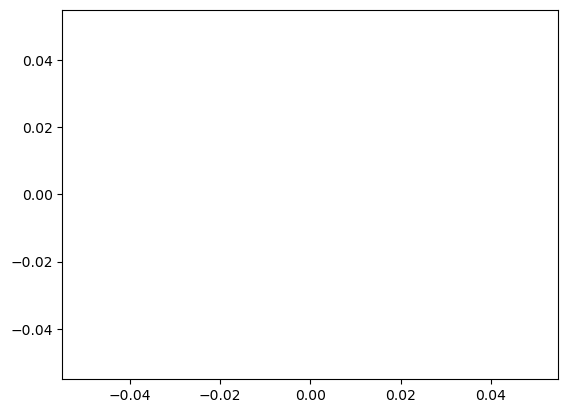

In [6]:
Es = np.linspace(10, 30, 300)
B = [boundary(e) for e in Es]
plt.plot(Es, np.abs(B))

In [11]:
Fvec(xi)

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

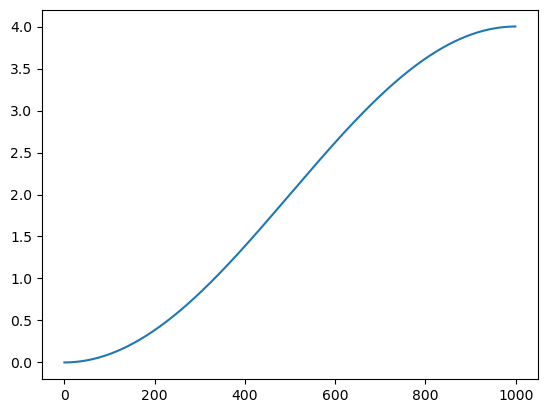

In [27]:
plt.plot(eig);plt.show()

In [29]:
vecs[:, i] # is the i'th eigenvector

array([-0.00018639, -0.00037319, -0.00056083, -0.00074971, -0.00094025,
       -0.00113289, -0.00132804, -0.00152615, -0.00172765, -0.00193299,
       -0.00214263, -0.00235703, -0.00257667, -0.00280203, -0.00303363,
       -0.00327197, -0.00351758, -0.00377101, -0.00403282, -0.0043036 ,
       -0.00458394, -0.00487448, -0.00517585, -0.00548872, -0.00581379,
       -0.00615179, -0.00650347, -0.00686959, -0.00725099, -0.00764851,
       -0.00806303, -0.00849547, -0.0089468 , -0.00941802, -0.00991017,
       -0.01042434, -0.0109617 , -0.01152341, -0.01211074, -0.012725  ,
       -0.01336754, -0.01403979, -0.01474325, -0.01547949, -0.01625013,
       -0.0170569 , -0.01790158, -0.01873917, -0.01956935, -0.02039177,
       -0.02120612, -0.02201207, -0.02280931, -0.02359752, -0.02437638,
       -0.02514559, -0.02590484, -0.02665384, -0.02739228, -0.02811988,
       -0.02883634, -0.02954139, -0.03023474, -0.03091611, -0.03158525,
       -0.03224187, -0.03288573, -0.03351657, -0.03413414, -0.03

In [19]:
mat = np.zeros(M.shape)

In [22]:
%timeit for i in range(mat.shape[0]): mat[i, i] = vi[i]

92.7 µs ± 870 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit np.fill_diagonal(mat, vi)

4 µs ± 96.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
mat

array([[2.00261884, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.00261884, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.00261884, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.00261884, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.00261884,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.00261884]])

In [40]:
np.diag_indices?

Signature: np.diag_indices(n, ndim=2)
Docstring:
Return the indices to access the main diagonal of an array.

This returns a tuple of indices that can be used to access the main
diagonal of an array `a` with ``a.ndim >= 2`` dimensions and shape
(n, n, ..., n). For ``a.ndim = 2`` this is the usual diagonal, for
``a.ndim > 2`` this is the set of indices to access ``a[i, i, ..., i]``
for ``i = [0..n-1]``.

Parameters
----------
n : int
  The size, along each dimension, of the arrays for which the returned
  indices can be used.

ndim : int, optional
  The number of dimensions.

See Also
--------
diag_indices_from

Notes
-----
.. versionadded:: 1.4.0

Examples
--------
Create a set of indices to access the diagonal of a (4, 4) array:

>>> di = np.diag_indices(4)
>>> di
(array([0, 1, 2, 3]), array([0, 1, 2, 3]))
>>> a = np.arange(16).reshape(4, 4)
>>> a
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
>>> a[di] = 100
>>> a
array([[100,   1

In [41]:
%timeit eig, vecs = np.linalg.eigh(M)

126 ms ± 7.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
